In [1]:
DATA_DIR = "../data/"
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all podcasts and calculate average words per episode
podcast_stats = {}

# Get all podcast folders
podcast_folders = [f for f in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, f))]

for podcast in podcast_folders:
    podcast_path = os.path.join(DATA_DIR, podcast)
    
    # Get all .txt files (transcripts) in this podcast folder
    txt_files = [f for f in os.listdir(podcast_path) if f.endswith('.txt')]
    
    if len(txt_files) == 0:
        continue
    
    # Count words in each transcript
    word_counts = []
    for txt_file in txt_files:
        txt_path = os.path.join(podcast_path, txt_file)
        try:
            with open(txt_path, 'r', encoding='utf-8') as f:
                content = f.read()
                word_count = len(content.split())
                word_counts.append(word_count)
        except Exception as e:
            print(f"Error reading {txt_path}: {e}")
            continue
    
    # Calculate average words per episode
    if word_counts:
        avg_words = np.mean(word_counts)
        podcast_stats[podcast] = {
            'avg_words': avg_words,
            'num_episodes': len(word_counts)
        }

print(f"Analyzed {len(podcast_stats)} podcasts")
print(f"Sample stats for first podcast: {list(podcast_stats.items())[0] if podcast_stats else 'None'}")

Analyzed 83 podcasts
Sample stats for first podcast: ('calcio_berlin', {'avg_words': np.float64(5749.8978102189785), 'num_episodes': 274})


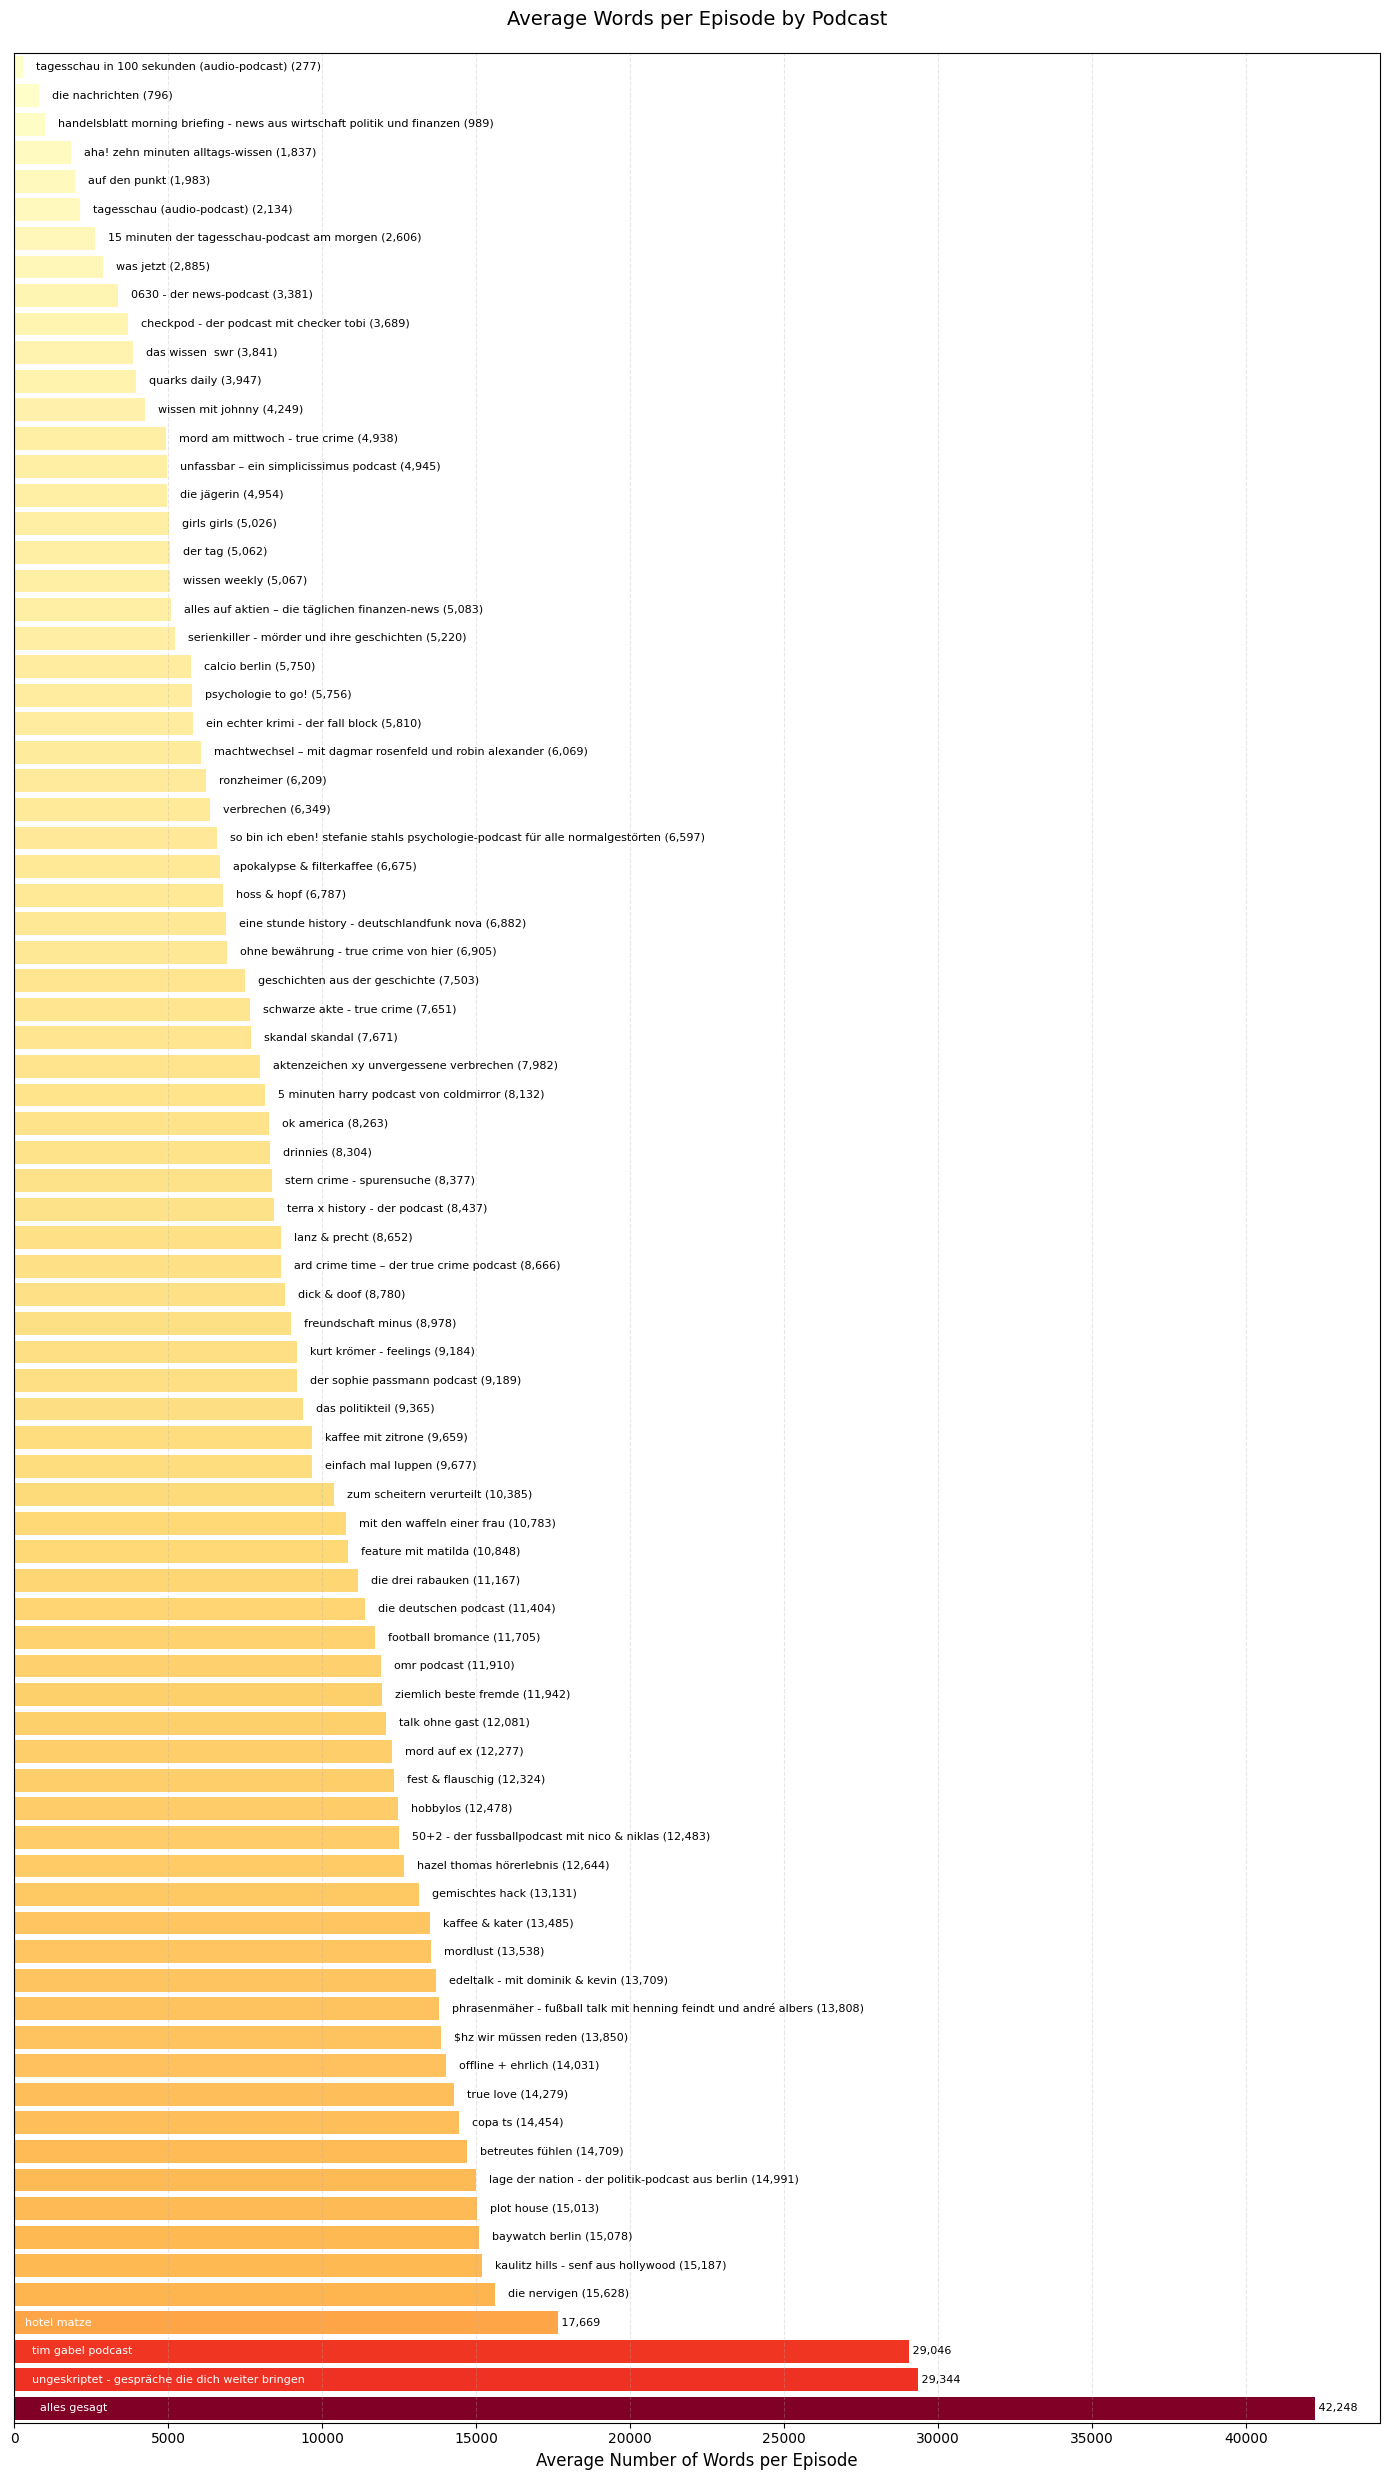


Top 5 podcasts by average words per episode:
1. alles_gesagt: 42,248 words (across 40 episodes)
2. ungeskriptet_-_gespräche_die_dich_weiter_bringen: 29,344 words (across 39 episodes)
3. tim_gabel_podcast: 29,046 words (across 199 episodes)
4. hotel_matze: 17,669 words (across 475 episodes)
5. die_nervigen: 15,628 words (across 162 episodes)


In [3]:
# Create horizontal bar chart with heat color scheme
# Sort podcasts by average words per episode
sorted_podcasts = sorted(podcast_stats.items(), key=lambda x: x[1]['avg_words'], reverse=True)

# Extract data for plotting
podcast_names = [name for name, _ in sorted_podcasts]
avg_words = [stats['avg_words'] for _, stats in sorted_podcasts]

# Create figure with appropriate size
fig, ax = plt.subplots(figsize=(14, max(8, len(podcast_names) * 0.3)))

# Create heat color scheme - normalize values for color mapping
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
norm = Normalize(vmin=min(avg_words), vmax=max(avg_words))
cmap = plt.cm.YlOrRd  # Yellow-Orange-Red heat colormap
colors = [cmap(norm(value)) for value in avg_words]

# Create horizontal bar chart with heat colors
bars = ax.barh(range(len(podcast_names)), avg_words, color=colors)

# Remove y-axis labels to give more space to bars
ax.set_yticks([])

# Customize the plot
ax.set_xlabel('Average Number of Words per Episode', fontsize=12)
ax.set_title('Average Words per Episode by Podcast', fontsize=14, pad=20)

# Add podcast names inside or next to bars
max_value = max(avg_words)
for i, (name, value) in enumerate(zip(podcast_names, avg_words)):
    # Determine if name fits inside bar (use 40% of max as threshold)
    if value > max_value * 0.4:
        # Put name inside bar (white text)
        ax.text(value * 0.02, i, name.replace('_', ' '), 
                va='center', ha='left', fontsize=8, color='white')
        # Put value at end of bar
        ax.text(value, i, f' {value:,.0f}', 
                va='center', ha='left', fontsize=8)
    else:
        # Put name outside bar (black text)
        ax.text(value + max_value * 0.01, i, f"{name.replace('_', ' ')} ({value:,.0f})", 
                va='center', ha='left', fontsize=8, color='black')

# Remove top and bottom empty space
ax.set_ylim(-0.5, len(podcast_names) - 0.5)

# Improve layout
plt.tight_layout()
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Show the plot
plt.show()

print(f"\nTop 5 podcasts by average words per episode:")
for i, (name, stats) in enumerate(sorted_podcasts[:5], 1):
    print(f"{i}. {name}: {stats['avg_words']:,.0f} words (across {stats['num_episodes']} episodes)")

Distribution of word counts:
50th percentile: 6,273 words
75th percentile: 11,361 words
90th percentile: 15,474 words
95th percentile: 17,756 words
99th percentile: 27,980 words
99.5th percentile: 33,325 words

Total episodes: 23,418
Mean: 7,701 words
Median: 6,273 words
Max: 93,936 words


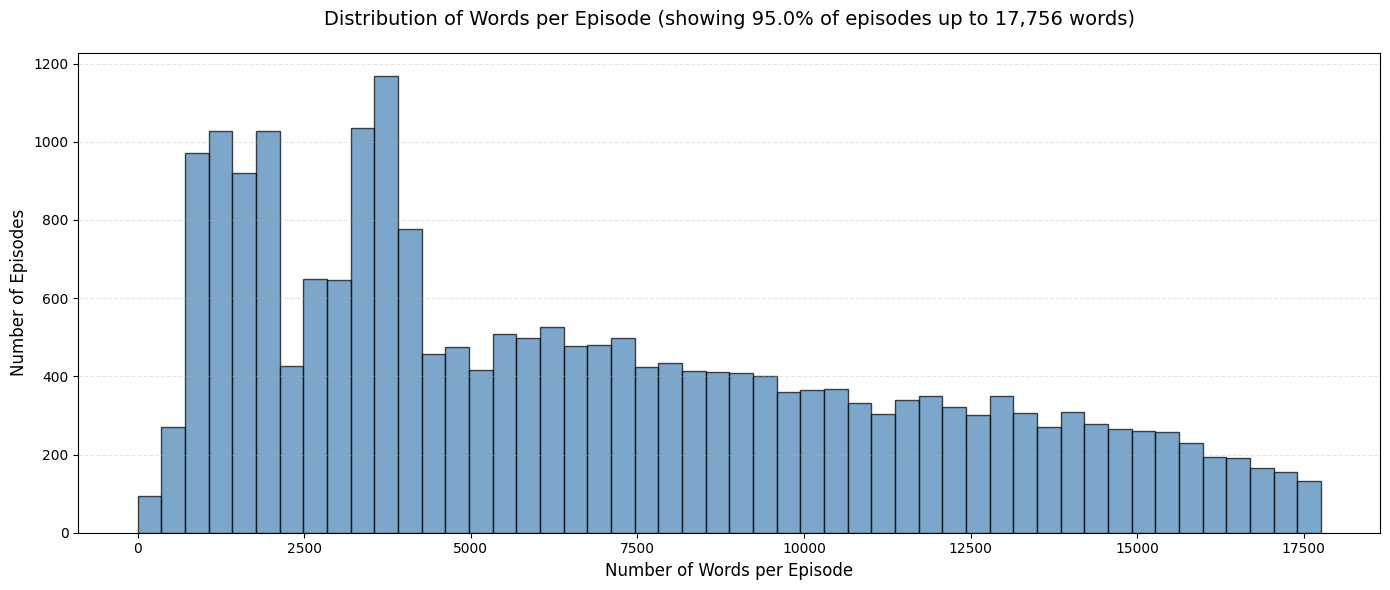

In [3]:
# Create histogram of word counts across all episodes
all_episode_word_counts = []

# Collect word counts from all episodes across all podcasts
for podcast in podcast_folders:
    podcast_path = os.path.join(DATA_DIR, podcast)
    
    # Get all .txt files (transcripts) in this podcast folder
    txt_files = [f for f in os.listdir(podcast_path) if f.endswith('.txt')]
    
    for txt_file in txt_files:
        txt_path = os.path.join(podcast_path, txt_file)
        try:
            with open(txt_path, 'r', encoding='utf-8') as f:
                content = f.read()
                word_count = len(content.split())
                all_episode_word_counts.append(word_count)
        except Exception as e:
            continue

# Calculate percentiles to understand the distribution
percentiles = [50, 75, 90, 95, 99, 99.5]
print("Distribution of word counts:")
for p in percentiles:
    value = np.percentile(all_episode_word_counts, p)
    print(f"{p}th percentile: {value:,.0f} words")

print(f"\nTotal episodes: {len(all_episode_word_counts):,}")
print(f"Mean: {np.mean(all_episode_word_counts):,.0f} words")
print(f"Median: {np.median(all_episode_word_counts):,.0f} words")
print(f"Max: {np.max(all_episode_word_counts):,.0f} words")

# Create histogram focusing on the main distribution (up to 95th percentile)
percentile_95 = np.percentile(all_episode_word_counts, 95)

plt.figure(figsize=(14, 6))

# Plot histogram with x-axis capped at 95th percentile
plt.hist(all_episode_word_counts, bins=50, range=(0, percentile_95), 
         color='steelblue', edgecolor='black', alpha=0.7)

# Customize the plot
plt.xlabel('Number of Words per Episode', fontsize=12)
plt.ylabel('Number of Episodes', fontsize=12)

# Calculate how many episodes are shown
episodes_shown = sum(1 for x in all_episode_word_counts if x <= percentile_95)
pct_shown = (episodes_shown / len(all_episode_word_counts)) * 100

plt.title(f'Distribution of Words per Episode (showing {pct_shown:.1f}% of episodes up to {percentile_95:,.0f} words)', 
          fontsize=14, pad=20)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
# Load the saved BERTopic model and results
import pickle
from pathlib import Path

OUTPUT_DIR = Path("./outputs/")

# Load the trained BERTopic model
print("Loading BERTopic model...")
with open(OUTPUT_DIR / "bertopic_model.pkl", 'rb') as f:
    topic_model = pickle.load(f)

# Load the document topics
doc_topics_df = pd.read_csv(OUTPUT_DIR / "document_topics.csv")
topic_info = pd.read_csv(OUTPUT_DIR / "topic_info.csv")

print(f"✓ Model loaded successfully")
print(f"✓ {len(doc_topics_df):,} documents loaded")
print(f"✓ {len(topic_info)} topics found (including outliers)")

Loading BERTopic model...
✓ Model loaded successfully
✓ 23,417 documents loaded
✓ 177 topics found (including outliers)
✓ Model loaded successfully
✓ 23,417 documents loaded
✓ 177 topics found (including outliers)


In [5]:
# 1. INTERTOPIC DISTANCE MAP
# Shows topics as circles in 2D space - size represents topic prevalence, proximity shows similarity

print("Generating intertopic distance map...")

fig = topic_model.visualize_topics()
fig.update_layout(
    title="Intertopic Distance Map - Topics in 2D Space",
    width=1000,
    height=800,
    template="plotly_white"
)
fig.show()

print("✓ Intertopic distance map generated")
print("  - Each circle represents a topic")
print("  - Circle size = number of documents in that topic")
print("  - Distance between circles = topic similarity")

Generating intertopic distance map...


✓ Intertopic distance map generated
  - Each circle represents a topic
  - Circle size = number of documents in that topic
  - Distance between circles = topic similarity


In [6]:
# 2. TOPIC SIMILARITY HEATMAP
# Shows how similar topics are to each other

print("Generating topic similarity heatmap...")

fig = topic_model.visualize_heatmap(
    n_clusters=20,  # Group similar topics
    width=1000,
    height=1000
)
fig.update_layout(
    title="Topic Similarity Heatmap",
    template="plotly_white"
)
fig.show()

print("✓ Topic similarity heatmap generated")
print("  - Darker colors = higher similarity")
print("  - Topics are clustered by similarity")

Generating topic similarity heatmap...


✓ Topic similarity heatmap generated
  - Darker colors = higher similarity
  - Topics are clustered by similarity


In [ ]:
# 3. DOCUMENTS IN 2D SPACE (Scatter Plot)
# Shows all podcast episodes colored by their assigned topic

print("Generating document scatter plot in 2D space...")
print("This may take a moment as we need to load all documents...")

# Load all documents from the data directory
documents = []
for podcast in podcast_folders:
    podcast_path = os.path.join(DATA_DIR, podcast)
    txt_files = [f for f in os.listdir(podcast_path) if f.endswith('.txt')]
    
    for txt_file in txt_files:
        txt_path = os.path.join(podcast_path, txt_file)
        try:
            with open(txt_path, 'r', encoding='utf-8') as f:
                content = f.read().strip()
                if content:
                    documents.append(content)
        except Exception as e:
            continue

print(f"✓ Loaded {len(documents):,} documents")

# Create the visualization
fig = topic_model.visualize_documents(
    documents,
    topics=doc_topics_df['topic'].tolist(),
    width=1200,
    height=800,
    hide_document_hover=False  # Show episode info on hover
)
fig.update_layout(
    title="All Podcast Episodes in 2D Topic Space",
    template="plotly_white"
)
fig.show()

print("✓ Document scatter plot generated")
print("  - Each point represents one podcast episode")
print("  - Color indicates the assigned topic")
print("  - Hover over points to see episode details")

Generating document scatter plot in 2D space...
This may take a moment as we need to load all documents...
✓ Loaded 23,417 documents
✓ Loaded 23,417 documents


In [7]:
# 4. TOPIC HIERARCHY (Dendrogram)
# Shows how topics are related and can be grouped together

print("Generating topic hierarchy dendrogram...")

fig = topic_model.visualize_hierarchy(
    width=1200,
    height=800
)
fig.update_layout(
    title="Topic Hierarchy - How Topics Relate and Merge",
    template="plotly_white"
)
fig.show()

print("✓ Topic hierarchy generated")
print("  - Shows hierarchical clustering of topics")
print("  - Topics that merge early are more similar")

Generating topic hierarchy dendrogram...


✓ Topic hierarchy generated
  - Shows hierarchical clustering of topics
  - Topics that merge early are more similar


In [8]:
# 5. TOP TOPICS BAR CHART
# Interactive bar chart showing the most common topics

print("Generating top topics bar chart...")

fig = topic_model.visualize_barchart(
    top_n_topics=15,
    n_words=8,
    width=900,
    height=600
)
fig.update_layout(
    title="Top 15 Topics by Frequency - Word Importance Scores",
    template="plotly_white"
)
fig.show()

print("✓ Top topics bar chart generated")
print("  - Shows the 15 most common topics")
print("  - Each bar shows the importance of keywords for that topic")

Generating top topics bar chart...


✓ Top topics bar chart generated
  - Shows the 15 most common topics
  - Each bar shows the importance of keywords for that topic


Generating podcast-topic distribution analysis...


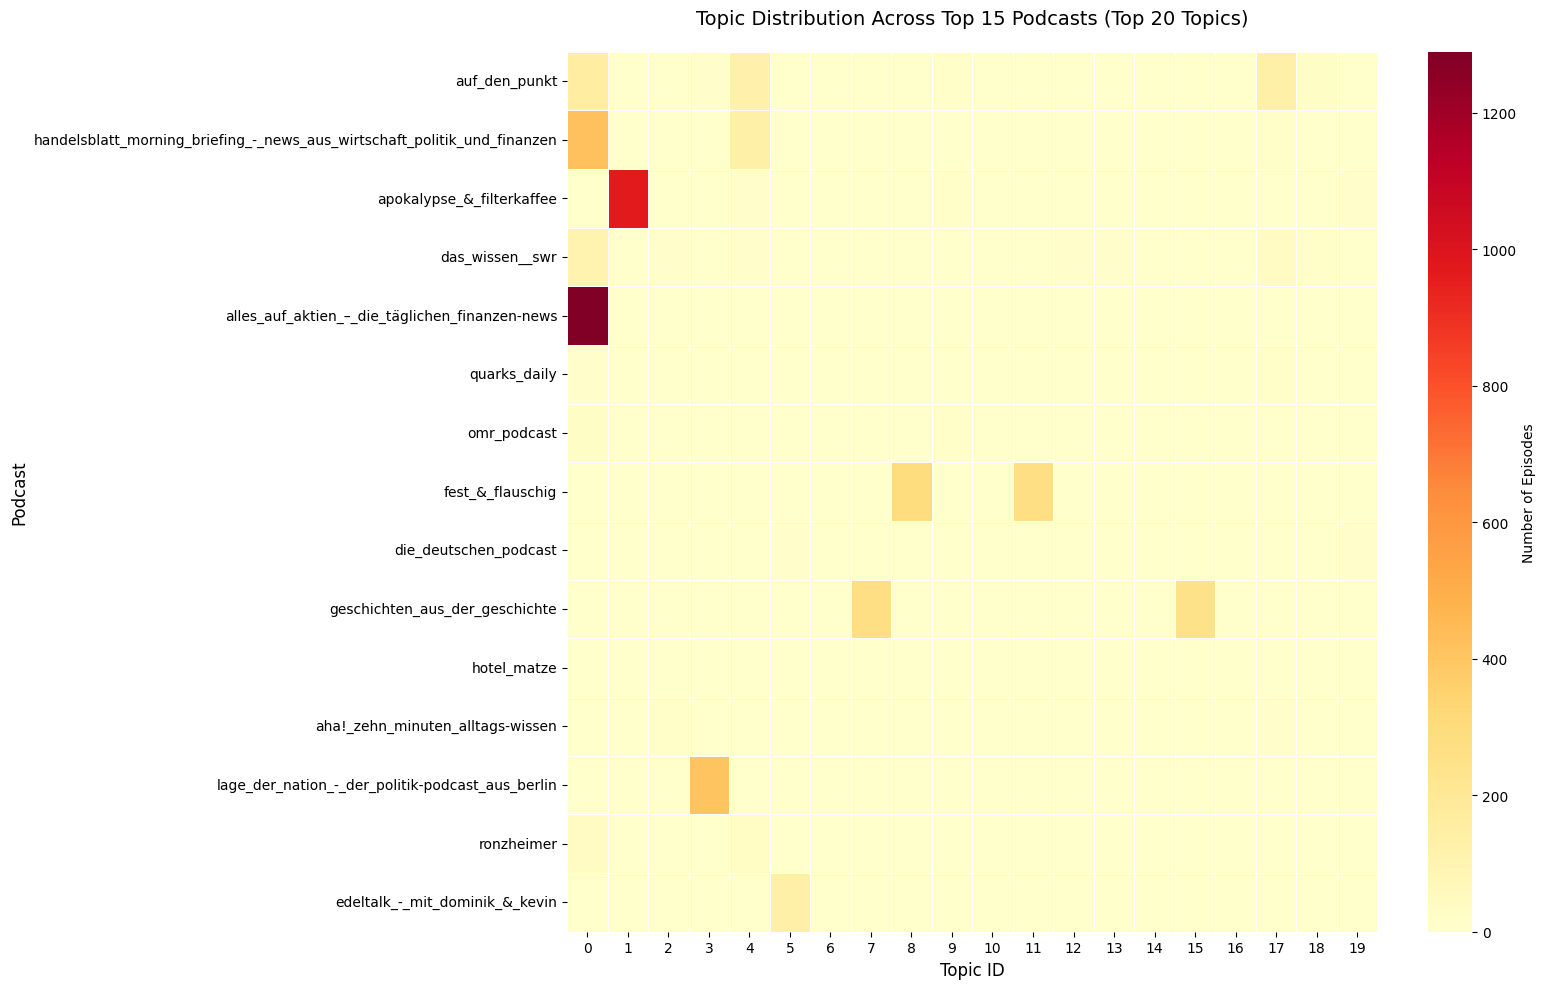

✓ Podcast-topic distribution heatmap generated
  - Shows 15 podcasts with most episodes
  - Across the 20 most common topics
  - Darker colors = more episodes in that topic


In [9]:
# 6. TOPIC DISTRIBUTION ACROSS PODCASTS
# Custom visualization showing which topics appear in which podcasts

print("Generating podcast-topic distribution analysis...")

# Create a pivot table showing topics per podcast
topic_podcast_matrix = doc_topics_df[doc_topics_df['topic'] != -1].groupby(['podcast', 'topic']).size().unstack(fill_value=0)

# Get top 20 most common topics
top_topics = doc_topics_df[doc_topics_df['topic'] != -1]['topic'].value_counts().head(20).index

# Filter to top topics and top podcasts by episode count
top_podcasts = doc_topics_df['podcast'].value_counts().head(15).index
filtered_matrix = topic_podcast_matrix.loc[top_podcasts, top_topics]

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    filtered_matrix,
    cmap='YlOrRd',
    cbar_kws={'label': 'Number of Episodes'},
    linewidths=0.5,
    linecolor='white'
)

plt.title('Topic Distribution Across Top 15 Podcasts (Top 20 Topics)', fontsize=14, pad=20)
plt.xlabel('Topic ID', fontsize=12)
plt.ylabel('Podcast', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("✓ Podcast-topic distribution heatmap generated")
print(f"  - Shows {len(top_podcasts)} podcasts with most episodes")
print(f"  - Across the {len(top_topics)} most common topics")
print("  - Darker colors = more episodes in that topic")